In [32]:
import mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

%matplotlib inline

In [299]:
cars_flag = True
if cars_flag:
    src = '../cars/car.data'
    import warnings
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
else:
    src = '../adult/data.txt'
data = pd.read_csv(src, index_col=0)

In [300]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [301]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [302]:
# Set data set specific settings for template

mappings = {}
cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'class']
if cars_flag:
    scoring = metrics.make_scorer(metrics.matthews_corrcoef)    
    for i in data.columns:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)
else:
    scoring = 'accuracy'    
    for i in cols:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)

In [303]:
mappings

{'buying': ['high', 'low', 'med', 'vhigh'],
 'maint': ['high', 'low', 'med', 'vhigh'],
 'doors': ['2', '3', '4', '5more'],
 'persons': ['2', '4', 'more'],
 'lug_boot': ['big', 'med', 'small'],
 'safety': ['high', 'low', 'med'],
 'class': ['acc', 'good', 'unacc', 'vgood']}

In [304]:
one_hot = OneHotEncoder(sparse=False, dtype=np.int)

In [305]:
X = data.loc[:,data.columns != 'class']
y = data.iloc[:,-1]

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [307]:
X_train.shape

(1382, 6)

In [308]:
X_train_hot = one_hot.fit_transform(X_train)
X_test_hot = one_hot.fit_transform(X_test)
y_train_hot = one_hot.fit_transform(y_train.values.reshape(-1,1))
y_test_hot = one_hot.fit_transform(y_test.values.reshape(-1,1))

In [309]:
print(X_train_hot.shape,
X_test_hot.shape,
y_train_hot.shape,
y_test_hot.shape)

(1382, 21) (346, 21) (1382, 4) (346, 4)


In [310]:
clf = mlrose.NeuralNetwork(hidden_nodes = [150,150],
                           activation = 'relu',
                           algorithm = 'random_hill_climb',
                           max_iters = 2000,
                           bias = True,
                           is_classifier = True,
                           learning_rate = 0.0001,
                           early_stopping = True,
                           clip_max = 5,
                           restarts = 0,
                           max_attempts = 100,
                           random_state = 1,
                           curve = True)

In [311]:
clf.fit(X_train_hot, y_train_hot)

NeuralNetwork(bias=True, clip_max=5, early_stopping=True,
              hidden_nodes=[150, 150], is_classifier=True, learning_rate=0.0001,
              max_iters=2000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x7fbd71829d30>)

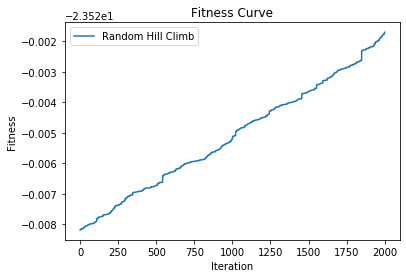

In [312]:
plt.title("Fitness Curve")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.plot(range(len(clf.fitness_curve)), 
         clf.fitness_curve, 
         label="Random Hill Climb")
#plt.plot(range(len(sa_curve)), sa_curve, label="Simulated Annealing")
#plt.plot(range(len(ga_curve)), ga_curve, label="Genetic Algorithm")
#plt.plot(range(len(mm_curve)), mm_curve, label="MIMIC")
plt.legend(loc='best')

In [313]:
y_train_pred = clf.predict(X_train_hot)
y_test_pred = clf.predict(X_test_hot)

In [314]:
print(metrics.matthews_corrcoef(y_train_hot.argmax(axis=1),
                                y_train_pred.argmax(axis=1)))

print(metrics.matthews_corrcoef(y_test_hot.argmax(axis=1),
                                y_test_pred.argmax(axis=1)))

0.02915234653251346
0.022157313435201123


In [172]:
clf = mlrose.NeuralNetwork(hidden_nodes = [150,150],
                           activation = 'relu',
                           algorithm = 'random_hill_climb',
                           max_iters = 2000,
                           bias = False,
                           is_classifier = True,
                           learning_rate = 0.0001,
                           early_stopping = True,
                           clip_max = 10,
                           restarts = 0,
                           max_attempts = 500,
                           random_state = 1,
                           curve = True)

In [173]:
clf.fit(X_train_hot, y_train_hot)

NeuralNetwork(bias=False, clip_max=10, early_stopping=True,
              hidden_nodes=[150, 150], is_classifier=True, learning_rate=0.0001,
              max_iters=2000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x7fbd71829d30>)

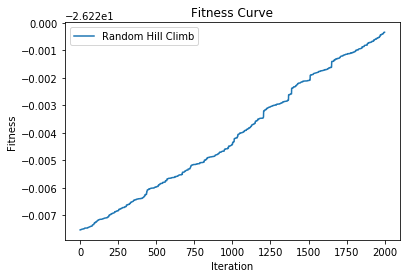

In [174]:
plt.title("Fitness Curve")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.plot(range(len(clf.fitness_curve)), 
         clf.fitness_curve, 
         label="Random Hill Climb")
#plt.plot(range(len(sa_curve)), sa_curve, label="Simulated Annealing")
#plt.plot(range(len(ga_curve)), ga_curve, label="Genetic Algorithm")
#plt.plot(range(len(mm_curve)), mm_curve, label="MIMIC")
plt.legend(loc='best')

In [175]:
y_train_pred = clf.predict(X_train_hot)
y_test_pred = clf.predict(X_test_hot)

In [176]:
print(metrics.matthews_corrcoef(y_train_hot.argmax(axis=1),
                                y_train_pred.argmax(axis=1)))

print(metrics.matthews_corrcoef(y_test_hot.argmax(axis=1),
                                y_test_pred.argmax(axis=1)))

-0.028417547866103593
-0.03411362689722335


In [349]:
clf = mlrose.NeuralNetwork(hidden_nodes = [150,150],
                           activation = 'relu',
                           algorithm = 'random_hill_climb',
                           max_iters = 10000,
                           bias = False,
                           is_classifier = True,
                           learning_rate = 0.0001,
                           early_stopping = True,
                           clip_max = 0.01,
                           restarts = 0,
                           max_attempts = 1000,
                           random_state = 1,
                           curve = True)

In [350]:
clf.fit(X_train_hot, y_train_hot)

KeyboardInterrupt: 

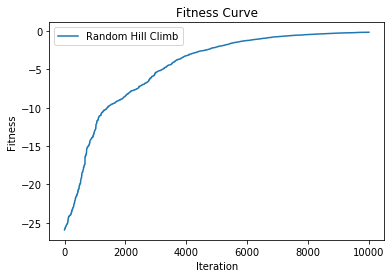

In [317]:
plt.title("Fitness Curve")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.plot(range(len(clf.fitness_curve)), 
         clf.fitness_curve, 
         label="Random Hill Climb")
#plt.plot(range(len(sa_curve)), sa_curve, label="Simulated Annealing")
#plt.plot(range(len(ga_curve)), ga_curve, label="Genetic Algorithm")
#plt.plot(range(len(mm_curve)), mm_curve, label="MIMIC")
plt.legend(loc='best')

In [318]:
y_train_pred = clf.predict(X_train_hot)
y_test_pred = clf.predict(X_test_hot)

In [319]:
print(metrics.matthews_corrcoef(y_train_hot.argmax(axis=1),
                                y_train_pred.argmax(axis=1)))

print(metrics.matthews_corrcoef(y_test_hot.argmax(axis=1),
                                y_test_pred.argmax(axis=1)))

0.918716789446894
0.709548235163425


In [344]:
# Learning Curve
train_sizes= [0.1, 0.2, 0.4, 0.6, 0.8]

clf = mlrose.NeuralNetwork(hidden_nodes = [150,150],
                           activation = 'relu',
                           algorithm = 'random_hill_climb',
                           max_iters = 10000,
                           bias = False,
                           is_classifier = True,
                           learning_rate = 0.0001,
                           early_stopping = True,
                           clip_max = 0.01,
                           restarts = 0,
                           max_attempts = 1000,
                           random_state = 1,
                           curve = False)

train_scores = []
test_scores = []
for x in train_sizes:
    X_train_lc, X_test_lc, y_train_lc, y_test_lc = train_test_split(X_train_hot,
                                                                    y_train_hot,
                                                                    test_size=0.2,
                                                                    train_size=x,
                                                                    random_state = 1)
    clf.fit(X_train_lc, y_train_lc)
    y_train_pred = clf.predict(X_train_lc)
    y_test_pred = clf.predict(X_test_lc)
    train_scores.append(metrics.matthews_corrcoef(y_train_lc.argmax(axis=1),
                                                  y_train_pred.argmax(axis=1)))

    test_scores.append(metrics.matthews_corrcoef(y_test_lc.argmax(axis=1),
                                                 y_test_pred.argmax(axis=1)))

In [345]:
train_amount = [x * X_train_hot.shape[0] for x in train_sizes]

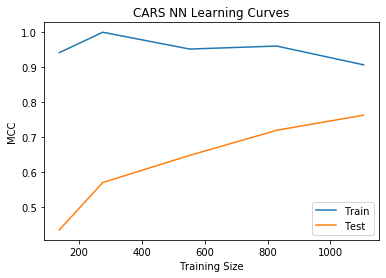

In [346]:
plt.title("CARS NN Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("MCC")
plt.plot(train_amount, train_scores, label="Train")
plt.plot(train_amount, test_scores, label="Test")
plt.legend(loc='best')

In [351]:
clf = mlrose.NeuralNetwork(hidden_nodes = [150,150],
                           activation = 'relu',
                           algorithm = 'random_hill_climb',
                           max_iters = 10000,
                           bias = False,
                           is_classifier = True,
                           learning_rate = 0.001,
                           early_stopping = True,
                           clip_max = 0.01,
                           restarts = 0,
                           max_attempts = 1000,
                           random_state = 1,
                           curve = True)

In [352]:
clf.fit(X_train_hot, y_train_hot)

NeuralNetwork(bias=False, clip_max=0.01, early_stopping=True,
              hidden_nodes=[150, 150], is_classifier=True, learning_rate=0.001,
              max_iters=10000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x7fbd71829d30>)

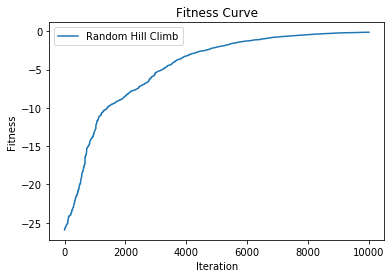

In [353]:
plt.title("Fitness Curve")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.plot(range(len(clf.fitness_curve)), 
         clf.fitness_curve, 
         label="Random Hill Climb")
#plt.plot(range(len(sa_curve)), sa_curve, label="Simulated Annealing")
#plt.plot(range(len(ga_curve)), ga_curve, label="Genetic Algorithm")
#plt.plot(range(len(mm_curve)), mm_curve, label="MIMIC")
plt.legend(loc='best')

In [354]:
y_train_pred = clf.predict(X_train_hot)
y_test_pred = clf.predict(X_test_hot)

In [355]:
print(metrics.matthews_corrcoef(y_train_hot.argmax(axis=1),
                                y_train_pred.argmax(axis=1)))

print(metrics.matthews_corrcoef(y_test_hot.argmax(axis=1),
                                y_test_pred.argmax(axis=1)))

0.9152086260521586
0.7163347349970164


In [344]:
# Learning Curve
train_sizes= [0.1, 0.2, 0.4, 0.6, 0.8]

clf = mlrose.NeuralNetwork(hidden_nodes = [150,150],
                           activation = 'relu',
                           algorithm = 'random_hill_climb',
                           max_iters = 10000,
                           bias = False,
                           is_classifier = True,
                           learning_rate = 0.0001,
                           early_stopping = True,
                           clip_max = 0.01,
                           restarts = 0,
                           max_attempts = 1000,
                           random_state = 1,
                           curve = False)

train_scores = []
test_scores = []
for x in train_sizes:
    X_train_lc, X_test_lc, y_train_lc, y_test_lc = train_test_split(X_train_hot,
                                                                    y_train_hot,
                                                                    test_size=0.2,
                                                                    train_size=x,
                                                                    random_state = 1)
    clf.fit(X_train_lc, y_train_lc)
    y_train_pred = clf.predict(X_train_lc)
    y_test_pred = clf.predict(X_test_lc)
    train_scores.append(metrics.matthews_corrcoef(y_train_lc.argmax(axis=1),
                                                  y_train_pred.argmax(axis=1)))

    test_scores.append(metrics.matthews_corrcoef(y_test_lc.argmax(axis=1),
                                                 y_test_pred.argmax(axis=1)))

In [345]:
train_amount = [x * X_train_hot.shape[0] for x in train_sizes]

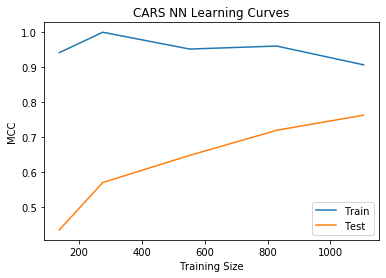

In [346]:
plt.title("CARS NN Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("MCC")
plt.plot(train_amount, train_scores, label="Train")
plt.plot(train_amount, test_scores, label="Test")
plt.legend(loc='best')

In [356]:
clf = mlrose.NeuralNetwork(hidden_nodes = [150,150],
                           activation = 'relu',
                           algorithm = 'random_hill_climb',
                           max_iters = 10000,
                           bias = False,
                           is_classifier = True,
                           learning_rate = 0.001,
                           early_stopping = True,
                           clip_max = 0.01,
                           restarts = 50,
                           max_attempts = 1000,
                           random_state = 1,
                           curve = True)

In [ ]:
clf.fit(X_train_hot, y_train_hot)

In [354]:
y_train_pred = clf.predict(X_train_hot)
y_test_pred = clf.predict(X_test_hot)

In [355]:
print(metrics.matthews_corrcoef(y_train_hot.argmax(axis=1),
                                y_train_pred.argmax(axis=1)))

print(metrics.matthews_corrcoef(y_test_hot.argmax(axis=1),
                                y_test_pred.argmax(axis=1)))

0.9152086260521586
0.7163347349970164
